### ML/DL HW2 - Data Analysis with NYC Taxi dataset

1. Copy this notebook and solve them by following the instruction.
2. Upload the dataset in your directory before executing this code.
  * Train data (71,514 rows; 2023/01/01-2023/01/23): [Download](https://drive.google.com/file/d/15Ne57MIFPFYgDMpbL5kOly9CjAoZe19r/view?usp=sharing)
  * Test data (28,390 rows; 2023/01/24-2023/01/31): [Download](https://drive.google.com/file/d/15Mi8vm2guvePB7RaY6LPi3fxXOwLFlyw/view?usp=sharing)

3. Note: Your code for all of the programming exercises including this one should be submitted to the corresponding Programming submission slot on Gradescope.

Reference
* https://github.com/TanmayKedari/Exploratory-Analysis-of-NYC-Taxi/blob/master/NYC%20Taxi%20Trip%20Duration.ipynb

In [1]:
!pip install pandas pyarrow
import numpy as np
import pandas as pd
from google.colab import files
files=files.upload()

Saving yellow_tripdata_2023-01_small_test.parquet to yellow_tripdata_2023-01_small_test.parquet
Saving yellow_tripdata_2023-01_small_train.parquet to yellow_tripdata_2023-01_small_train.parquet


In [4]:
import pyarrow.parquet as pq

train = pq.read_table('./yellow_tripdata_2023-01_small_train.parquet').to_pandas()
test = pq.read_table('./yellow_tripdata_2023-01_small_test.parquet').to_pandas()

In [86]:
train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:33:53,2023-01-01 00:49:15,1.0,2.95,1.0,N,33,61,1,17.7,1.0,0.5,4.04,0.00,1.0,24.24,0.0,0.00
1,2,2023-01-01 00:47:59,2023-01-01 01:16:34,5.0,2.35,1.0,N,43,233,1,23.3,1.0,0.5,5.66,0.00,1.0,33.96,2.5,0.00
2,2,2023-01-01 00:59:58,2023-01-01 01:11:43,1.0,2.04,1.0,N,137,114,1,13.5,1.0,0.5,3.70,0.00,1.0,22.20,2.5,0.00
3,2,2023-01-01 00:53:50,2023-01-01 01:15:46,1.0,7.05,1.0,N,263,144,1,32.4,1.0,0.5,4.00,0.00,1.0,41.40,2.5,0.00
4,2,2023-01-01 00:09:27,2023-01-01 00:15:04,1.0,0.80,1.0,N,236,75,1,5.5,0.5,0.5,1.86,0.00,0.3,11.16,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71509,2,2023-01-23 23:13:59,2023-01-23 23:36:04,1.0,10.48,1.0,N,70,61,2,42.2,1.0,0.5,0.00,0.00,1.0,45.95,0.0,1.25
71510,2,2023-01-23 23:57:55,2023-01-24 00:37:38,1.0,17.65,2.0,N,132,163,1,70.0,0.0,0.5,22.20,0.00,1.0,97.45,2.5,1.25
71511,2,2023-01-23 23:24:38,2023-01-23 23:48:41,1.0,12.12,1.0,N,70,142,1,47.8,6.0,0.5,13.12,6.55,1.0,78.72,2.5,1.25
71512,2,2023-01-23 23:04:04,2023-01-23 23:12:30,1.0,1.64,1.0,N,68,163,2,10.7,1.0,0.5,0.00,0.00,1.0,15.70,2.5,0.00


In [87]:
test

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-24 00:16:29,2023-01-24 00:24:21,1.0,1.78,1.0,N,164,233,1,10.70,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0
1,1,2023-01-24 00:46:53,2023-01-24 00:48:41,1.0,0.80,1.0,N,229,237,1,5.10,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
2,1,2023-01-24 00:16:11,2023-01-24 00:29:05,2.0,3.00,1.0,N,90,141,1,16.30,3.5,0.5,4.25,0.0,1.0,25.55,2.5,0.0
3,2,2023-01-24 00:17:19,2023-01-24 00:31:04,1.0,3.33,1.0,N,114,97,1,18.40,1.0,0.5,8.00,0.0,1.0,31.40,2.5,0.0
4,2,2023-01-24 00:01:54,2023-01-24 00:08:18,1.0,1.48,1.0,N,230,234,1,9.30,1.0,0.5,2.86,0.0,1.0,17.16,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28385,1,2023-01-31 22:32:00,2023-01-31 22:49:41,NaN,0.00,NaN,None,144,143,0,13.00,1.0,0.5,0.00,0.0,1.0,20.00,NaN,NaN
28386,2,2023-01-31 22:27:39,2023-01-31 22:45:27,NaN,4.56,NaN,None,186,238,0,20.00,0.0,0.5,4.80,0.0,1.0,28.80,NaN,NaN
28387,2,2023-01-31 22:40:00,2023-01-31 22:58:00,NaN,4.34,NaN,None,68,236,0,20.88,0.0,0.5,2.49,0.0,1.0,27.37,NaN,NaN
28388,1,2023-01-31 23:18:36,2023-01-31 23:27:44,NaN,0.00,NaN,None,48,229,0,3.90,0.0,0.5,0.00,0.0,1.0,7.90,NaN,NaN


In [66]:
for cor in train.columns:
  print(cor, train[cor].dtype)

#we can see that 'store_and_fwd_flag' column is object type

VendorID int64
tpep_pickup_datetime datetime64[ns]
tpep_dropoff_datetime datetime64[ns]
passenger_count float64
trip_distance float64
RatecodeID float64
store_and_fwd_flag object
PULocationID int64
DOLocationID int64
payment_type int64
fare_amount float64
extra float64
mta_tax float64
tip_amount float64
tolls_amount float64
improvement_surcharge float64
total_amount float64
congestion_surcharge float64
airport_fee float64


In [67]:
print(type(train['store_and_fwd_flag'][0]))
print(train['store_and_fwd_flag'].dtype)

<class 'str'>
object


In [10]:
print(train.isnull().sum()) #we found that there is no null data in train data set

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


In [11]:
print(test.isnull().sum()) #there are many null data in test data set, so we need to deal with that.

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2430
trip_distance               0
RatecodeID               2430
store_and_fwd_flag       2430
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     2430
airport_fee              2430
dtype: int64


In [63]:
dur_time_0=train['tpep_dropoff_datetime'][0] - train['tpep_pickup_datetime'][0]
print(dur_time_0)
print(type(dur_time_0))

0 days 00:15:22
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [64]:
print(dur_time_0.total_seconds())
print(type(dur_time_0.total_seconds()))
#I used total_seconds() method to change Timedelta object to float type seconds.

922.0
<class 'float'>


In [154]:
# Check the below cells before fill in your code.

import pyarrow.parquet as pq

class Dataset:
  train_x = None  # X (data) of training set.
  train_y = None  # Y (label) of training set.
  test_x = None # X (data) of test set.
  test_y = None # Y (label) of test set.

  def __init__(self):
    self.df_train = pq.read_table('./yellow_tripdata_2023-01_small_train.parquet').to_pandas()
    self.df_test = pq.read_table('./yellow_tripdata_2023-01_small_test.parquet').to_pandas()
    self.df_train = self.preprocess_data(self.df_train)
    self.df_test = self.preprocess_data(self.df_test)

  def preprocess_data(self, df):
    ### TODO: Preprocess your data (Impute null values; DO NOT drop any test cases)
    #Since we cannot drop null datas, we replace those with the meidian value.

    # This is replacing NaN value with the median value of each column.
    # I tried to replace all NaN to median, but there were error in test code because we can not apply median() method for string type. So I considered that case.
    for col in df.columns:
      if df[col].dtype == 'object':
        pass
      else:
        #The purpose is to fill the missing value (null/NaN) with the median of the column if the data type in each column is not an object(string).
        med = df[col].median()
        df[col].fillna(med, inplace=True)
    return df

  def getdata_linear_reg(self):
    ### Hint: Use self.df_train, self.df_test
    ### Three features (x): Passenger_count, trip_distance, trip_duration (seconds; use tpep_pickup_datetime, tpep_dropoff_datetime)
    ### Target (y): fare_amount


    #This is the procedure of computing trip_duration

    #I tried to get 'trip_duration' with loop at first, but I realized that using basic operations of pandas is much more readable and fast.
    '''
    trip_duration_train=[]
    trip_duration_test=[]

    for i in range(len(self.df_train['tpep_dropoff_datetime'])):
      trip_duration_train.append(self.df_train['tpep_dropoff_datetime'][i]-self.df_train['tpep_pickup_datetime'][i])
    for i in range(len(self.df_test['tpep_dropoff_datetime'])):
      trip_duration_test.append(self.df_test['tpep_dropoff_datetime'][i]-self.df_test['tpep_pickup_datetime'][i])
    self.df_train['trip_duration'] = np.array(trip_duration_train)
    self.df_test['trip_duration'] = np.array(trip_duration_test)
    '''

    #First, we need to subtract tpep_pickup_datetime from tpep_dropoff_datetime.
    self.df_train['trip_duration'] = self.df_train['tpep_dropoff_datetime'] - self.df_train['tpep_pickup_datetime']
    self.df_test['trip_duration'] = self.df_test['tpep_dropoff_datetime'] - self.df_test['tpep_pickup_datetime']

    #Second, since the type of trip_duration is Timedelta, I wanted to change it to seconds.
    self.df_train['trip_duration'] = self.df_train['trip_duration'].dt.total_seconds()
    self.df_test['trip_duration'] = self.df_test['trip_duration'].dt.total_seconds()


    #Finally, match features and respond. 'to_numpy()' to replace DataFrame and Series with NumPy arrays.
    self.train_x = self.df_train[['passenger_count', 'trip_distance', 'trip_duration']].to_numpy()
    self.train_y = self.df_train['fare_amount'].to_numpy()
    self.test_x = self.df_test[['passenger_count', 'trip_distance', 'trip_duration']].to_numpy()
    self.test_y = self.df_test['fare_amount'].to_numpy()

    return [self.train_x, self.train_y, self.test_x, self.test_y]

  def correlation(self, X, Y):
    stacked_data = np.vstack((X.T, Y))
    corr_matrix = np.corrcoef(stacked_data)
    correlations = corr_matrix[-1, :-1]

    return correlations

    pass



# Test Code

Provide some test code with your Linear regression code. Also, Compare with sklearn.LinearRegression().

### 1. Prepare the dataset (8pt)
Load the train and test datasets.

methods:

(1) **preprocess_data(self, df)**: Handle None and null values (2pt)

(2) **getdata_linear_reg(self)**: Separate the features/labels of the train/test set and save them separately in a numpy array format.(4pt)

(3) **correlation(self, X, Y)**: Calculate the correlation between each features and target Y in training set (2pt)



In [155]:
dataset = Dataset()
[train_x, train_y, test_x, test_y] = dataset.getdata_linear_reg()
print(train_x)
print(train_y)
print(test_x)
print(test_y)

dataset.correlation(train_x, train_y)

[[1.000e+00 2.950e+00 9.220e+02]
 [5.000e+00 2.350e+00 1.715e+03]
 [1.000e+00 2.040e+00 7.050e+02]
 ...
 [1.000e+00 1.212e+01 1.443e+03]
 [1.000e+00 1.640e+00 5.060e+02]
 [1.000e+00 4.030e+00 8.240e+02]]
[17.7 23.3 13.5 ... 47.8 10.7 19.1]
[[1.00e+00 1.78e+00 4.72e+02]
 [1.00e+00 8.00e-01 1.08e+02]
 [2.00e+00 3.00e+00 7.74e+02]
 ...
 [1.00e+00 4.34e+00 1.08e+03]
 [1.00e+00 0.00e+00 5.48e+02]
 [1.00e+00 3.05e+00 8.39e+02]]
[10.7   5.1  16.3  ... 20.88  3.9  15.8 ]


array([0.03716105, 0.89185981, 0.79295615])

### Question 2: Linear Regression Using Scikit-learn (6 points)

For this task, you are required to implement linear regression utilizing the scikit-learn library. You will be working with the LinearRegression module, which provides functions and methods tailored for this purpose.

For comprehensive documentation and usage guidelines, please refer to the official scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Ensure to:
* Properly import the necessary libraries and modules.
* Provide a brief explanation or observation after obtaining the results.

Root Mean Squared Error (RMSE) on test data: 6.70

Model Coefficients: [0.11415376 2.92476095 0.00525156]
Model Intercept: 3.71


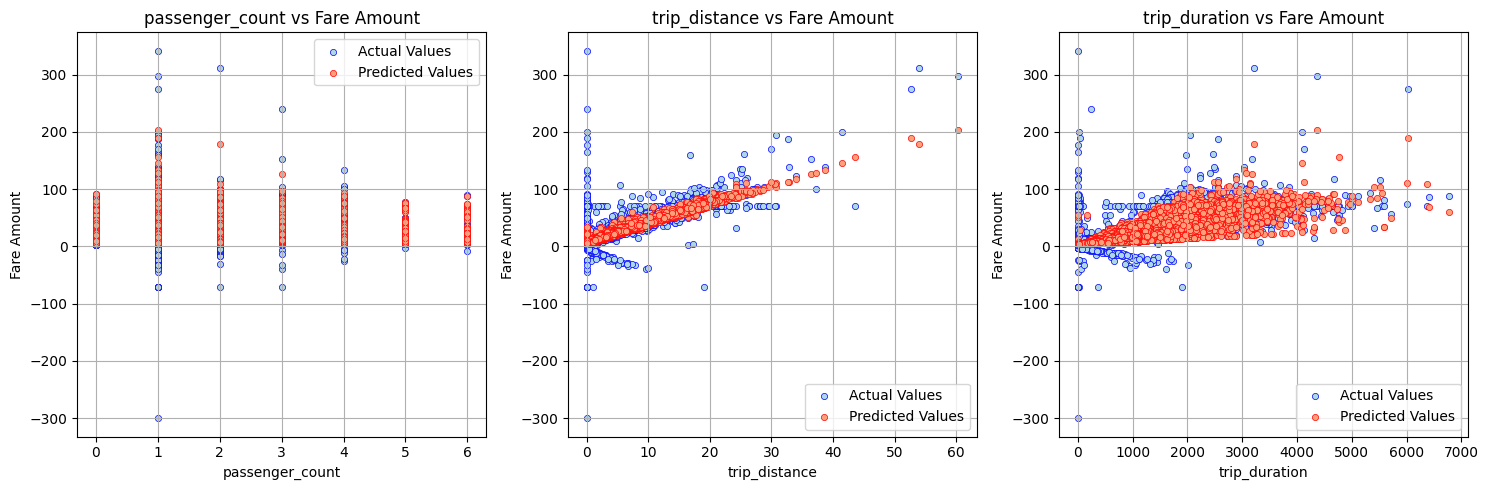

In [173]:
# # Install necessary libraries
# !pip install sklearn

# Import required modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
linear = LinearRegression()

# Fit the model to the training data (Use train_x, train_y, and linear.fit function)
linear.fit(train_x,train_y)

# Predict the target values for the test dataset (Use linear.predict function and test_x to find y_hat)
y_hat = linear.predict(test_x)


def RMSE(true, predicted):

  diff = true - predicted
  mean_squared_diff = np.mean(diff ** 2)
  rmse = np.sqrt(mean_squared_diff)
  return rmse

error = RMSE(test_y, y_hat)
print(f"Root Mean Squared Error (RMSE) on test data: {error:.2f}")

# Find the slope (coefficients) and intercepts
slope = linear.coef_
intercept = linear.intercept_
print(f"\nModel Coefficients: {slope}")
print(f"Model Intercept: {intercept:.2f}")

import matplotlib.pyplot as plt
# Add plots to visualize the difference between actual vs predicted values

predictors = ['passenger_count', 'trip_distance', 'trip_duration']
fig, axes = plt.subplots(ncols=len(predictors), figsize=(15, 5))

for i, predictor in enumerate(predictors):
  axes[i].scatter(test_x[:, i], test_y, color='lightblue', label='Actual Values', edgecolors="b", linewidth=0.5, s=20)
  axes[i].scatter(test_x[:, i], y_hat, color='lightsalmon', label='Predicted Values', edgecolors="r", linewidth=0.5, s=20)
  axes[i].set_xlabel(predictor)
  axes[i].set_ylabel('Fare Amount')
  axes[i].set_title(f'{predictor} vs Fare Amount')
  axes[i].legend()
  axes[i].grid(True)

plt.tight_layout()
plt.show()



In [160]:
print(test_x.shape)
print(test_y.shape)
print(y_hat.shape)

(28390, 3)
(28390,)
(28390,)


In [140]:
y_hat

array([11.50634871,  6.72851685, 16.77468053, ..., 22.18668237,
        6.69939242, 17.14811591])

### 3. Craft Your Linear Regression Algorithm (6pt)
Delve into the foundations of linear regression by constructing your own model to make predictions on the dataset.

While detailed annotations will guide your implementation, do not use external libraries such as scikit-learn. Using the numpy library is permitted.

Begin your exploration by understanding the closed form solution for linear regression. Subsequently, familiarize yourself with the gradient descent methodology.



In [257]:
from numpy import *

class Linear:

    w = None

    def __init__(self, eta=0.01, epoch=100):
        self.w = None
        self.eta = eta
        self.epoch = epoch

    def setEta(self, etaVal):
        self.eta = etaVal

    def setEpoch(self, nepoch):
        self.epoch = nepoch

    def predict(self, X):
        """
        Perform inference
        """
        # Add a bias term with value 1 for each data point
        bias = ones((X.shape[0], 1))
        X_b = hstack((bias, X))

        return dot(X_b, self.w)

    def train(self, X, Y):
        """
        Construct a vanilla linear regressor using gradient descent.
        """
        #I couldn't write this code.


In [258]:
def RMSE(y_test, y_hat):
    diff = y_test - y_hat
    mean_squared_diff = np.mean(diff ** 2)
    rmse = np.sqrt(mean_squared_diff)
    return rmse

In [262]:
model.train(train_x, train_y)

In [263]:
y_hat

array([nan, nan, nan, ..., nan, nan, nan])

In [256]:
test_y

array([10.7 ,  5.1 , 16.3 , ..., 20.88,  3.9 , 15.8 ])

In [248]:
y_hat = model.predict(test_x)
print(y_hat)

[nan nan nan ... nan nan nan]


In [218]:
error = RMSE(test_y, y_hat)
print(error)

nan
